 ## MSN 514 HW:7

 ### Erinç Ada Ceylan 22101844

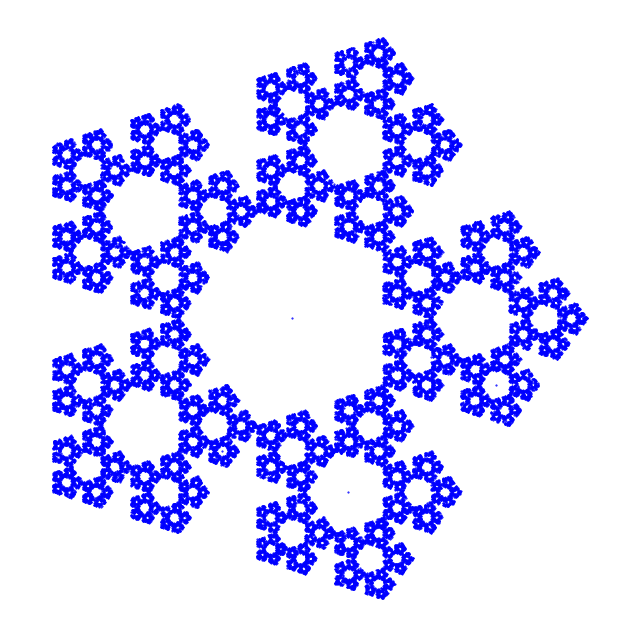

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)               
N        = 80000        
m        = 5                    
theta    = np.linspace(0, 2*np.pi, m, endpoint=False)
vertices = np.c_[np.cos(theta), np.sin(theta)]          # edeges of the polygon in the unit circle
r        = 1/1.61803398875                                        # choosen to mimic the desired fractal (golden ratio)

points   = np.zeros((N, 2))
choice   = np.random.randint(0, m, size=N-1)

for i in range(N-1):
    points[i+1] = vertices[choice[i]]*r + points[i]*(1-r)

plt.figure(figsize=(8,8))
plt.plot(points[:,0], points[:,1], '.', markersize=1, color='blue')
plt.axis('equal'); plt.axis('off')
plt.show()

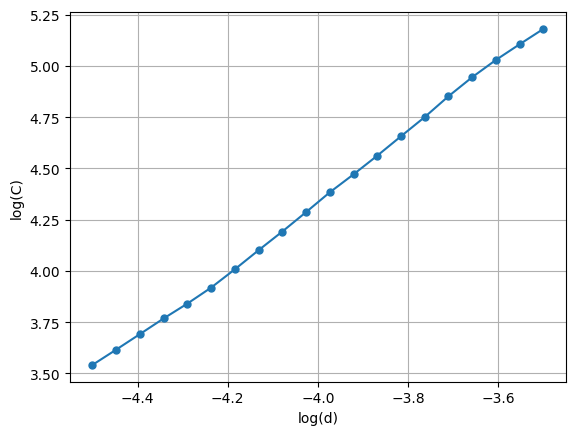

In [2]:
d  = np.exp(np.linspace(-4.5, -3.5, 20))    # radius
C  = np.zeros_like(d, dtype=float)
Nc = 10000                                  # random reference points
idx = np.random.permutation(N)[:Nc]

for n in idx:
    dx = points[:,0] - points[n,0]
    dy = points[:,1] - points[n,1]
    dist2 = dx*dx + dy*dy
    for k, dk in enumerate(d):
        C[k] += np.sum(dist2 < dk*dk)

C /= Nc                                      # mean
plt.figure()
plt.plot(np.log(d), np.log(C), '.-', markersize=10)
plt.xlabel('log(d)'); plt.ylabel('log(C)')
plt.grid(True)
plt.show()

In [3]:
slope, _ = np.polyfit(np.log(d), np.log(C), 1)
D_corr   = slope                             
D_self   = np.log(5)/np.log(2/(3-np.sqrt(5)))          

print(f"Point‑wise correlation dimension  : {D_corr:.4f}")
print(f"Self‑similarity dimension         : {D_self:.4f}")

Point‑wise correlation dimension  : 1.6885
Self‑similarity dimension         : 1.6723
